In [1]:
import rasterio

file = rasterio.open('murcia_dem_30m.tif')
dataset = file.read()
print(dataset.shape)

(1, 5406, 7182)


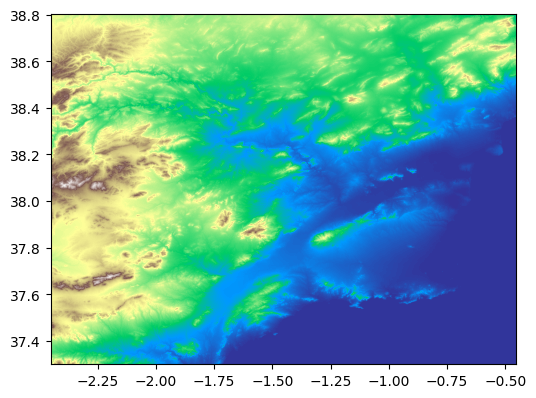

In [2]:
import matplotlib.pyplot as plt
from rasterio.plot import show

fig, ax = plt.subplots(1, 1, figsize=(6,6))

show(file, cmap='terrain')
plt.show()

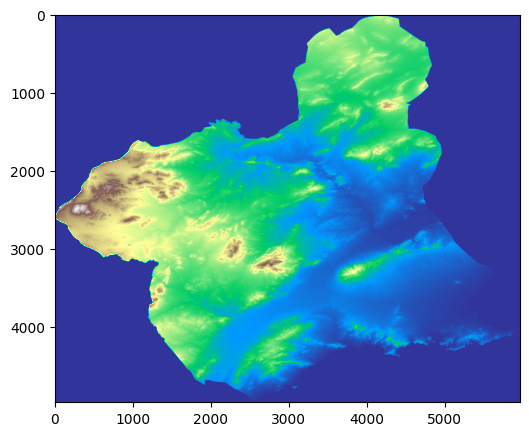

In [3]:
import geopandas as gpd
from shapely.geometry import mapping
from rasterio import mask as msk

df = gpd.read_file('CCAA_GEO_ETRS89.shp')

murcia = df.loc[df['id'] == 'CA14'].reset_index(drop=True)

clipped_array, clipped_transform = msk.mask(file, [mapping(murcia.iloc[0].geometry)], crop=True)

fig, ax = plt.subplots(1, 1, figsize=(6,6))

plt.imshow(clipped_array[0], cmap='terrain')
plt.show()

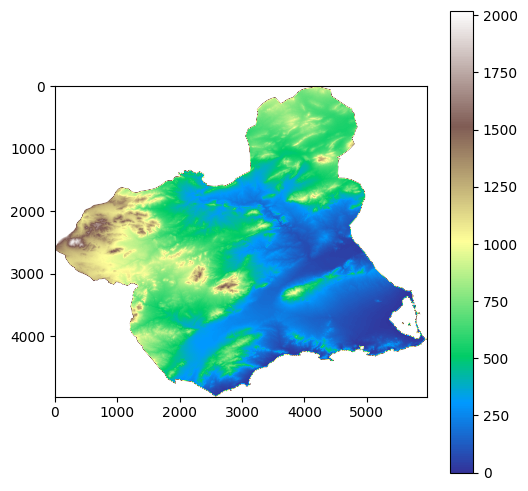

In [4]:
import numpy as np

def clip_raster(gdf, img):
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], crop=True)
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)],
                                                           crop=True, nodata=(np.amax(clipped_array[0]) + 1))
    clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))
    value_range = np.amax(clipped_array) + abs(np.amin(clipped_array))
    return clipped_array, value_range

murcia_topography, value_range = clip_raster(murcia, file)

fig, ax = plt.subplots(1, 1, figsize=(6,6))

c = plt.imshow(murcia_topography[0], cmap='terrain')
plt.colorbar(c)
plt.show()

In [5]:
print(f'Lowest altitude: {dataset.min():.2f} \
\nHighest altitude: {dataset.max():.2f}')

Lowest altitude: -10.22 
Highest altitude: 2079.63


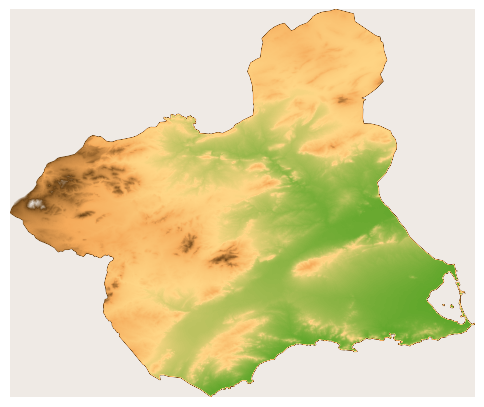

In [6]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors

norm = colors.Normalize(vmin=-10.3, vmax=2080)

value_range = 256

murcia_colormap = LinearSegmentedColormap.from_list('murcia',
                                                    ['#5aa528',
                                                     '#ffd787',
                                                     '#f5aa5a',
                                                     '#6e4619',
                                                     '#ffffff'],
                                                    N=value_range)

fig, ax = plt.subplots(1, 1, figsize=(6,6), facecolor='#ffffff')

plt.imshow(murcia_topography[0], cmap=murcia_colormap, norm=norm)
ax.axis('off')
plt.show()

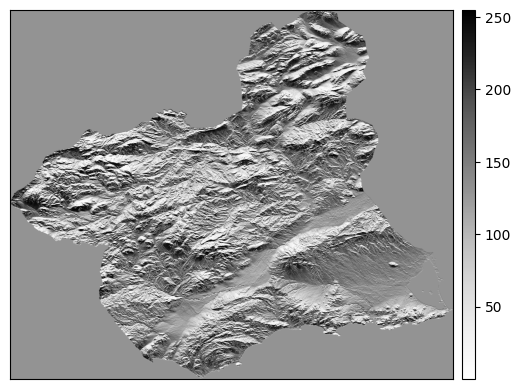

In [7]:
import earthpy.spatial as es
import earthpy.plot as ep

hillshade = es.hillshade(murcia_topography[0], azimuth=180, altitude=1)

ep.plot_bands(hillshade, cmap='Greys', figsize=(6,6))
plt.show()

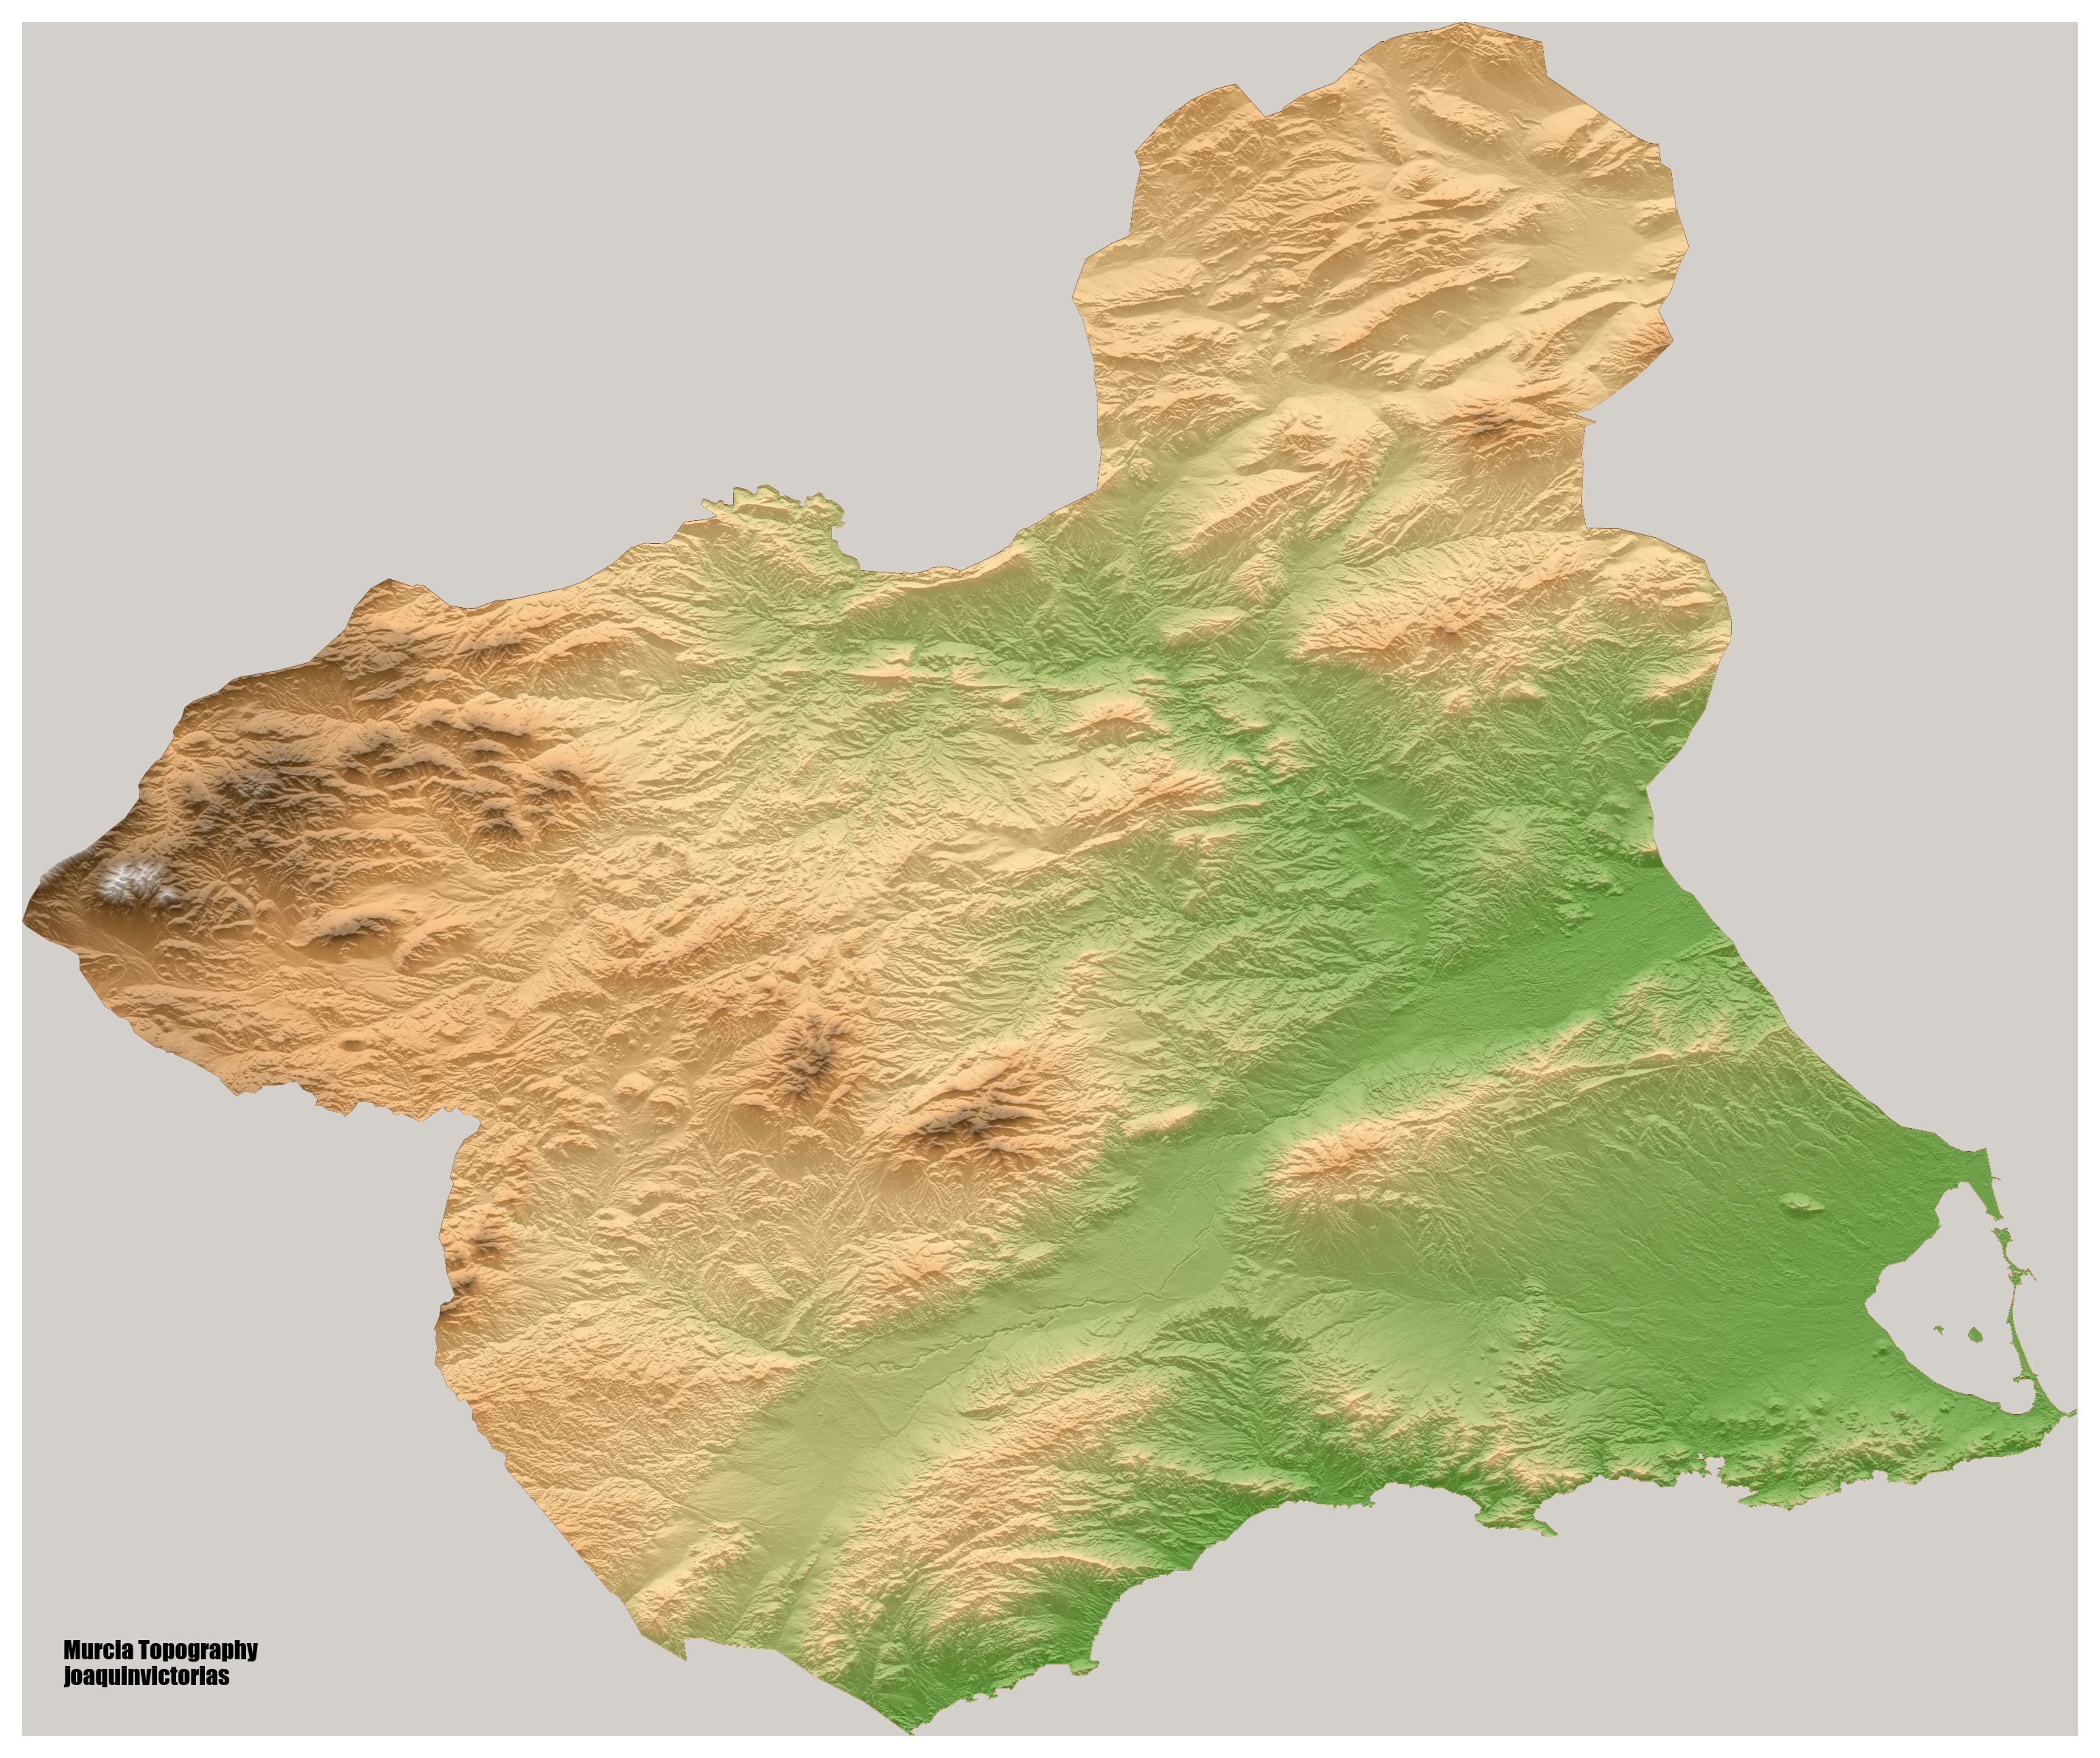

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12,12), dpi=300)

plt.imshow(murcia_topography[0], cmap=murcia_colormap, norm=norm)
ax.imshow(hillshade, cmap='Greys', alpha=0.3)
ax.axis('off')
ax.text(0.02, 0.03, 'Murcia Topography \njoaquinvictorias',
        size=8,
        color='black',
        transform = ax.transAxes,
        fontfamily='fantasy')
plt.show()